# Predict customer churn

### The objective of this project is to predict customer churn using a deep learning model. 
### Customer churn occurs when customers stop using a company’s services, which negatively impacts revenue. 
### By predicting which customers are likely to churn, businesses can take proactive measures to retain them. 
### The primary challenge is to build a model that can accurately identify potential churners from historical customer data.


# Data Preprocessing

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataset = pd.read_csv(r"D:\ML PROJECTS\DL\Churn Predidtion using ANN\Churn_Modelling.csv")

In [10]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
dataset["CustomerId"].nunique()#All customers are unique

10000

In [12]:
dataset.shape

(10000, 14)

### Missing Values

In [13]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [14]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
dataset.drop(["RowNumber","CustomerId","Surname"], axis = 1, inplace = True)

In [16]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
dataset["Geography"].unique()#Nominal

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
dataset["Gender"].unique()#Nominal

array(['Female', 'Male'], dtype=object)

### One Hot Encoding

In [19]:
dataset = pd.get_dummies(dataset,columns=["Geography","Gender"],drop_first=True)

In [20]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [21]:
dataset.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
Gender_Male             bool
dtype: object

<Axes: ylabel='Age'>

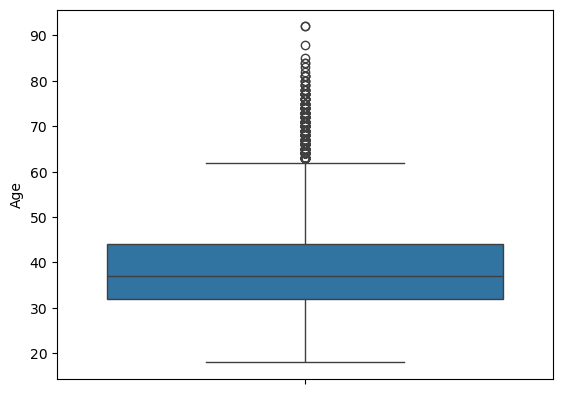

In [22]:
sns.boxplot(dataset["Age"])

#### Split the Independent and Dependent variables

In [23]:
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False


In [24]:
#Independent variables
X = dataset.drop("Exited",axis = 1)

In [25]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [26]:
type(X)

pandas.core.frame.DataFrame

In [27]:
X.shape

(10000, 11)

In [28]:
y = dataset["Exited"]

In [29]:
y.shape

(10000,)

In [30]:
X.shape

(10000, 11)

### Split the data into train and test set

In [31]:
#!pip install scikit-learn

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#20% --Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [34]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,False,False,True
1561,632,42,4,119624.60,2,1,1,195978.86,True,False,True
1670,559,24,3,114739.92,1,1,0,85891.02,False,True,True
6087,561,27,9,135637.00,1,1,0,153080.40,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,False,False,True
5191,682,58,1,0.00,1,1,1,706.50,False,False,False
5390,735,38,1,0.00,3,0,0,92220.12,False,False,False
860,667,43,8,190227.46,1,1,0,97508.04,False,False,True


In [35]:
X_train.shape

(8000, 11)

In [36]:
X_test.shape

(2000, 11)

In [37]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,False,False,True
1561,632,42,4,119624.60,2,1,1,195978.86,True,False,True
1670,559,24,3,114739.92,1,1,0,85891.02,False,True,True
6087,561,27,9,135637.00,1,1,0,153080.40,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,False,False,True
5191,682,58,1,0.00,1,1,1,706.50,False,False,False
5390,735,38,1,0.00,3,0,0,92220.12,False,False,False
860,667,43,8,190227.46,1,1,0,97508.04,False,False,True


### Scaling or Standardization or Normalization

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()#Creatin the object

In [40]:
#fit -- To apply the formula
#transform -- 
X_train = sc.fit_transform(X_train.values)

In [41]:
X_test = sc.transform(X_test.values)

In [42]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [43]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [44]:
#0 - Not exited
#1-- Exited
y_train.unique()

array([0, 1], dtype=int64)

### Handling Imbalanced Data

In [45]:
#!pip install imblearn

In [46]:
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
smot = SMOTE(k_neighbors = 5)

In [49]:
X_train,y_train = smot.fit_resample(X_train,y_train)

In [50]:
y_train.value_counts()

Exited
0    6356
1    6356
Name: count, dtype: int64

### Building the  NN Architecture

In [51]:
import tensorflow as tf

In [52]:
#Sequential
from tensorflow.keras.models import Sequential

In [53]:
from tensorflow.keras.layers import Dense, Input

### Initial the NN model

In [54]:
nn_model = Sequential()

### Add the Input layer

In [55]:
X_train.shape[1]

11

In [56]:
inp_layer = Input(shape = (X_train.shape[1],))

In [57]:
inp_layer

<KerasTensor shape=(None, 11), dtype=float32, sparse=False, name=keras_tensor>

In [58]:
nn_model.add(inp_layer)

### Add Hidden Layer

In [59]:
from tensorflow.keras.initializers import RandomNormal

In [60]:
rand = RandomNormal(mean=0.0, stddev=1)

In [61]:
#kernel -- weight matrix
#random_uniform, random_normal, ...
#kernel_initializer -- weights init strategy
#activation -- activation to be used
#units -- no of neurons in the layer
hidden_layer = Dense(kernel_initializer = "glorot_uniform", 
                     bias_initializer = "random_uniform", 
                     activation = "relu",
                     units = 30)

In [62]:
nn_model.add(hidden_layer)

### Add Hidden layer -2

In [63]:
hidden_layer_2 = Dense(kernel_initializer = "glorot_uniform", 
                     bias_initializer = "glorot_uniform", 
                     activation = "relu",
                     units = 20)

In [64]:
nn_model.add(hidden_layer_2)

### Add the output layer

In [65]:
output_layer = Dense(kernel_initializer = "glorot_uniform", 
                     bias_initializer = "glorot_uniform", 
                     activation = "sigmoid",
                     units = 1)

In [66]:
nn_model.add(output_layer)

### Compile the model

In [67]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

In [68]:
#sgd = SGD(learning_rate = 0.03, momentum = 0.9)

In [69]:
#rms_prop = RMSprop(learning_rate = 0.01, momentum = 0.9)

In [70]:
adam = Adam(learning_rate=0.001,  beta_1 = 0.9, beta_2 = 0.98, epsilon=1e-07)

In [71]:
#mention the strategies to be used while training the NN model
#loss -- error computing strategy
#optimizer -- weights updating strategy
#metrics --  Model performance computing strategy

nn_model.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ["accuracy"])

In [72]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,001 (3.91 KB)

 Trainable params: 1,001 (3.91 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
from tensorflow.keras.utils import plot_model

In [74]:
!pip install pydot

In [75]:
plot_model(nn_model, 
           show_shapes =  True, 
       show_layer_names = True,
          show_dtype = True,show_layer_activations = True, expand_nested  = True )

You must install pydot (`pip install pydot`) for `plot_model` to work.


### Train the NN Model

In [76]:
(X_train.shape[0])*0.9 / 64

178.76250000000002

In [77]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [78]:
ckpt = ModelCheckpoint("best_epoch_churn.keras", 
                       monitor = "val_accuracy", 
                       save_best_only = True, 
                       mode = "max",
                      verbose = True)

In [79]:
#batch_size -- No of observation to update the weights and send at once
#epochs -- no of iterations
train_logs = nn_model.fit(X_train, y_train, batch_size = 64, epochs = 100, 
                          validation_split = 0.1, callbacks = [ckpt])

Epoch 1/100
166/179 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6177 - loss: 0.6413
Epoch 1: val_accuracy improved from -inf to 0.70519, saving model to best_epoch_churn.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6222 - loss: 0.6374 - val_accuracy: 0.7052 - val_loss: 0.5729
Epoch 2/100
167/179 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7374 - loss: 0.5245
Epoch 2: val_accuracy improved from 0.70519 to 0.71855, saving model to best_epoch_churn.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7379 - loss: 0.5238 - val_accuracy: 0.7186 - val_loss: 0.5637
Epoch 3/100
174/179 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7603 - loss: 0.4932
Epoch 3: val_accuracy improved from 0.71855 to 0.76965, saving model to best_epoch_churn.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7604 - loss: 0.4927 - val_accuracy: 0.7697 - val_loss: 0.4825
Epoch 4/100
168/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7724 - loss: 0.4623
Epoch 4: val_accura

In [80]:
train_logs.history

{'accuracy': [0.6772727370262146,
  0.7443181872367859,
  0.7654720544815063,
  0.7787587642669678,
  0.7858391404151917,
  0.7923076748847961,
  0.7946678400039673,
  0.7961538434028625,
  0.8041958212852478,
  0.8025349378585815,
  0.804632842540741,
  0.8086538314819336,
  0.8070804476737976,
  0.8102272748947144,
  0.8091782927513123,
  0.8114510774612427,
  0.8102272748947144,
  0.8121503591537476,
  0.8134615421295166,
  0.8144230842590332,
  0.8144230842590332,
  0.8144230842590332,
  0.8164335489273071,
  0.8165209889411926,
  0.8190559148788452,
  0.8174825310707092,
  0.8148601651191711,
  0.8185314536094666,
  0.8215035200119019,
  0.8198426365852356,
  0.8229895234107971,
  0.8214160799980164,
  0.8224650621414185,
  0.8224650621414185,
  0.8216783404350281,
  0.8256118893623352,
  0.8243007063865662,
  0.8243007063865662,
  0.826748251914978,
  0.826748251914978,
  0.8284090757369995,
  0.8275349736213684,
  0.8280594348907471,
  0.8277971744537354,
  0.8283216953277588,
 

In [81]:
accuracy_list = train_logs.history["accuracy"]

In [82]:
epochs = list(range(1,len(accuracy_list)+1))

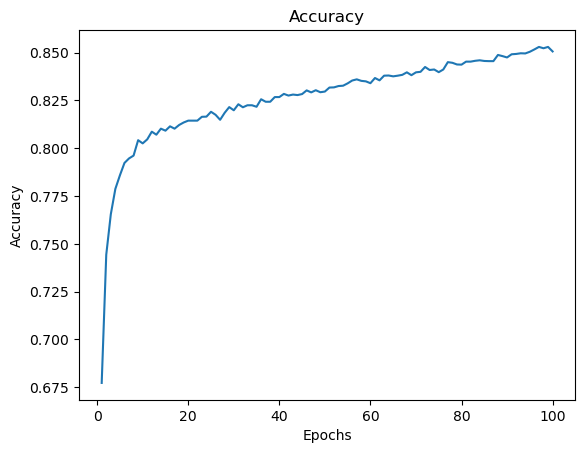

In [83]:
plt.plot(epochs, accuracy_list)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [84]:
loss_list = train_logs.history["loss"]

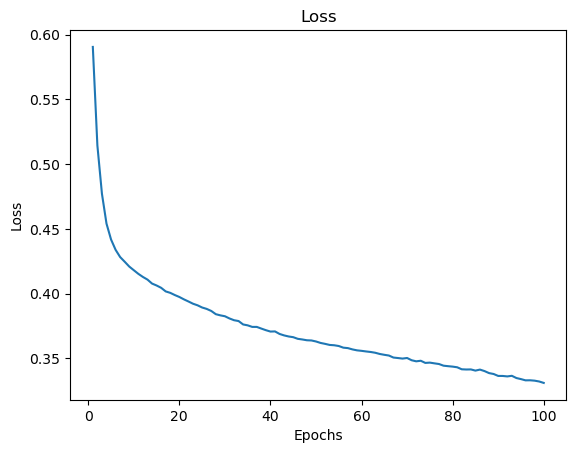

In [85]:
plt.plot(epochs, loss_list)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [86]:
val_accuracy_list = train_logs.history["val_accuracy"]

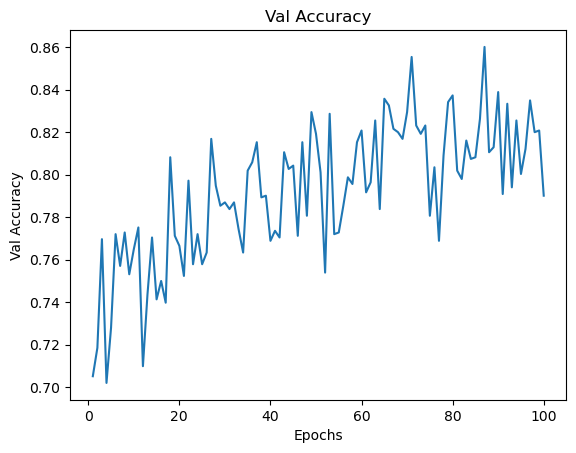

In [87]:
plt.plot(epochs, val_accuracy_list)
plt.title("Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.show()

In [88]:
val_loss = train_logs.history["val_loss"]

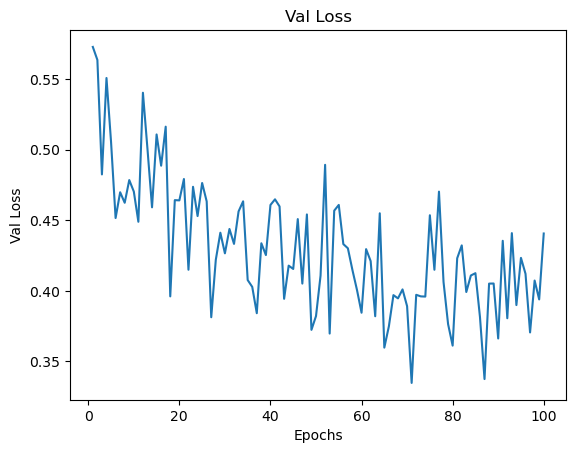

In [89]:
plt.plot(epochs, val_loss)
plt.title("Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Val Loss")
plt.show()

#### Prediction

In [90]:
len(X_test)

2000

In [91]:
y_pred  = nn_model.predict(X_test, verbose = False)

In [92]:
y_pred

array([[0.02944074],
       [0.00927944],
       [0.21613926],
       ...,
       [0.9239721 ],
       [0.10249399],
       [0.74151105]], dtype=float32)

In [93]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [94]:
y_pred = y_pred > 0.5

In [95]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [96]:
y_pred.dtype

dtype('bool')

In [97]:
y_pred = y_pred.astype("int")

In [98]:
from sklearn.metrics import accuracy_score, classification_report

In [99]:
print("Test Data Accuracy: ", accuracy_score(y_test, y_pred))

Test Data Accuracy:  0.814


In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1607
           1       0.52      0.63      0.57       393

    accuracy                           0.81      2000
   macro avg       0.71      0.75      0.73      2000
weighted avg       0.83      0.81      0.82      2000



In [101]:
y_train.value_counts()

Exited
0    6356
1    6356
Name: count, dtype: int64

### Real time prediction

In [102]:
new_data = list(X.iloc[20:21].values)

In [103]:
new_data

[array([732, 41, 8, 0.0, 2, 1, 1, 170886.17, False, False, True],
       dtype=object)]

In [104]:
new_data = sc.transform(new_data)

In [105]:
nn_model.predict(new_data) > 0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[False]])

### Save the model

In [106]:
nn_model.save("bank_churn.keras")

### Save the scaler

In [107]:
import joblib

In [108]:
joblib.dump(sc,"bank_churn_sc.pkl")

['bank_churn_sc.pkl']

### Conclusion
### In this project, we successfully built a deep learning model using an Artificial Neural Network to predict customer churn.
### The model was able to achieve an accuracy of 85%, with a high recall rate, indicating its effectiveness in identifying customers at risk of churning. 
### By employing the Adam optimizer, we ensured faster convergence and better model performance compared to other optimizers like SGD and RMSprop.